Flipkart Product Recommendation Engine 

Scrap Links for 5 Mobiles

In [2]:
import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Function to scrape reviews for a given mobile brand and item
def scrape_reviews(brand_xpath):
    # Open Flipkart URL
    driver.get(url)

    # Close the login popup if it appears
    try:
        close_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'✕')]"))
        )
        close_button.click()
    except Exception:
        pass  # Login popup not found or already closed.

    # Locate the filter section
    try:
        filter_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="container"]/div/div[3]/div[1]/div[1]'))
        )
    except Exception:
        pass  # Filter section not found.

    # Click on the mobile brand
    try:
        # Wait for the mobile brand element to be located
        mobile_brand = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, brand_xpath))
        )
        mobile_brand.click()
        time.sleep(10)  # Wait for the page to reload if the click is successful
    except Exception:
        return  # Exit the function if we cannot click the brand

    # Click the minimum price dropdown
    try:
        min_price = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//*[@id="container"]/div/div[3]/div[1]/div[1]/div/div[1]/div/section[2]/div[4]/div[1]'))
        )
        min_price.click()

        # Select the 20,000 option from the dropdown
        min_price_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[2]/div[4]/div[1]/select/option[4]'))
        )
        min_price_option.click()
        time.sleep(1)  # Allow time for the selection to process
    except Exception:
        pass  # Could not select minimum price.

    # Scroll down to make sure the brand element is visible
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)  # Allow time for the page to load

    # Scroll back up to the top
    driver.execute_script("window.scrollTo(0, 0);")
    time.sleep(1)  # Allow time for the scroll action to complete
    
    # Initialize an empty list to store product details
    product_details = []

    # Scrape product links, names, and prices from the current page and iterate through pagination
    while True:
        time.sleep(3)  # Allow time for page to load

        # Scrape phone links, names, and prices
        try:
            # Locate the div elements that contain product links
            product_divs = driver.find_elements(By.CSS_SELECTOR, "div._75nlfW")
            product_names = driver.find_elements(By.CSS_SELECTOR, "div.KzDlHZ")
            product_prices = driver.find_elements(By.CSS_SELECTOR, "div.Nx9bqj._4b5DiR")

            # Iterate over product divs and scrape details
            for i in range(len(product_divs)):
                try:
                    # Get the product link
                    link = product_divs[i].find_element(By.TAG_NAME, "a").get_attribute('href')

                    # Get the product name
                    name = product_names[i].text if i < len(product_names) else "N/A"

                    # Get the product price
                    price = product_prices[i].text if i < len(product_prices) else "N/A"

                    # Print scraped details
                    print(f'Product Link: {link}, Product Name: {name}, Price: {price}')

                    # Append the details to the product list
                    product_details.append([link, name, price])

                except Exception:
                    pass  # Error extracting product details, skip this product

            # Click the 'Next' button to go to the next page, if available
            try:
                next_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, "//span[contains(text(),'Next')]"))
                )
                driver.execute_script("arguments[0].scrollIntoView(true);", next_button)
                time.sleep(1)
                next_button.click()
                time.sleep(3)  # Wait for the next page to load
            except Exception:
                break  # No more pages or an error occurred

        except Exception:
            break  # Could not find phones or scrape links

    return product_details  # Return the scraped product details


# Initialize Chrome driver
driver = webdriver.Chrome()

# Open Flipkart URL
url = "https://www.flipkart.com/search?q=mobile+phones+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY"
driver.get(url)

# List of mobile brands and their respective XPaths
brands = {
    "Samsung": {
        "brand_xpath": '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[3]/div[2]/div[1]/div[3]',
    },
    
    "Google": {
        "brand_xpath": '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[3]/div[2]/div[1]/div[4]',
    },

    "Motorola": {
        "brand_xpath": '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[3]/div[2]/div[1]/div[5]',
    },

    "Vivo": {
        "brand_xpath": '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[3]/div[2]/div[1]/div[6]',
    },

    "Oppo": {
        "brand_xpath": '//*[@id="container"]/div/div[3]/div/div[1]/div/div[1]/div/section[3]/div[2]/div[1]/div[7]',
    }
}

# Prepare the CSV file for writing data
csv_file_path = "D:/Guvi/projects/Flipkart/Phone_Links.csv"
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Product Link", "Product Name", "Price"])  # Write headers
    
    # Iterate over each brand and scrape reviews
    for brand, xpaths in brands.items():
        print(f"Scraping reviews for {brand}...")
        product_details = scrape_reviews(xpaths["brand_xpath"])
        writer.writerows(product_details)  # Write all product details to the CSV after scraping each brand

# Close the browser
driver.quit()


Scraping reviews for Samsung...
Product Link: https://www.flipkart.com/samsung-galaxy-s23-fe-mint-256-gb/p/itmdb72279972171?pid=MOBGVTA2R8ZH4G3C&lid=LSTMOBGVTA2R8ZH4G3C8XDOZH&marketplace=FLIPKART&q=mobile+phones+&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=70507cb2-8e5d-4438-ae19-7af75d8c4982.MOBGVTA2R8ZH4G3C.SEARCH&ppt=sp&ppn=sp&ssid=ya1c6vh0jk0000001730653595163&qH=f696c2fbb0b173a0, Product Name: SAMSUNG Galaxy S23 FE (Mint, 256 GB), Price: ₹32,999
Product Link: https://www.flipkart.com/samsung-galaxy-s23-fe-mint-128-gb/p/itmfde87b854d383?pid=MOBGVTA2GRVRXVFR&lid=LSTMOBGVTA2GRVRXVFRPT6FPX&marketplace=FLIPKART&q=mobile+phones+&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=Search&iid=70507cb2-8e5d-4438-ae19-7af75d8c4982.MOBGVTA2GRVRXVFR.SEARCH&ppt=sp&ppn=sp&ssid=ya1c6vh0jk0000001730653595163&qH=f696c2fbb0b173a0, Product Name: SAMSUNG Galaxy S23 FE (Mint, 128 GB), Price: ₹29,999
Product Link: https://ww

Preprocess links

In [3]:
import pandas as pd

# Load the dataset
file_path = "D:/Guvi/projects/Flipkart/Phone_Links.csv"
df = pd.read_csv(file_path)

# Display original data shape
print(f"Original dataset size: {df.shape}")

# Remove duplicates
df = df.drop_duplicates()

# Clean the 'Price' column by removing currency symbol '₹' and commas, and then convert to float
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').str.strip().astype(float)

# Remove rows with price greater than 40000
df = df[df['Price'] <= 40000]

# Remove rows where the 'Product Link' contains the word 'refurbished'
df = df[~df['Product Link'].str.contains("refurbished", case=False)]

# Display cleaned data shape
print(f"Cleaned dataset size: {df.shape}")

# Save the cleaned dataset to a new CSV file
output_file_path = "D:/Guvi/projects/Flipkart/Cleaned_Phone_Links.csv"
df.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to {output_file_path}")


Original dataset size: (120, 3)
Cleaned dataset size: (93, 3)
Cleaned dataset saved to D:/Guvi/projects/Flipkart/Cleaned_Phone_Links.csv


scrap Reviews and rating 

In [4]:
import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Function to scrape product details
def scrape_product_details(product_link):
    # Load the product link in the current tab
    driver.get(product_link)  # Load the product link in the current tab
    driver.refresh()  # Refresh the page to ensure it loads properly

    # Get page source and parse with Beautiful Soup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Scrape the product name
    try:
        product_name = soup.select_one("h1._6EBuvT").get_text(strip=True)
        print(f'Product Name: {product_name}')
    except Exception as e:
        print("Could not find the product name.")
        product_name = "N/A"

    # Scrape the product price
    try:
        price = soup.select_one("div.Nx9bqj.CxhGGd").get_text(strip=True)
        print(f'Product Price: {price}')
    except Exception as e:
        print("Could not find the product price.")
        price = "N/A"

    # Click the 'All Reviews' section
    try:
        all_reviews_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "div._23J90q.RcXBOT"))
        )
        all_reviews_button.click()
    except Exception as e:
        print("Could not find or click on the 'All Reviews' button.")
        return []

    # Wait for reviews to load
    time.sleep(5)  # Adjust this time if needed

    # List to store scraped review data
    review_data = []

    # Scrape ratings and reviews across multiple pages
    page_count = 0
    max_pages = 25  # Set a maximum number of pages to prevent infinite loops

    while page_count < max_pages:
        time.sleep(5)  # Allow time for reviews to load

        # Scrape ratings and reviews
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        ratings = soup.select("div.XQDdHH.Ga3i8K")
        reviews = driver.find_elements(By.CSS_SELECTOR, "div.ZmyHeo")

        if not ratings or not reviews:
            print("No ratings or reviews found. Exiting...")
            break

        # Iterate over each review and handle the 'Read More' button
        for rating, review in zip(ratings, reviews):
            try:
                # Check for the 'Read More' button
                read_more_button = review.find_element(By.CSS_SELECTOR, "span.b4x-fr")
                if read_more_button:
                    driver.execute_script("arguments[0].click();", read_more_button)
                    time.sleep(1)  # Allow time for the review to expand

                # Scrape the full review text and format it
                full_review_text = review.text.replace('\n', ' ').replace('\r', '').strip()
            except Exception:
                # If no 'Read More' button is found, just get the text directly and format it
                full_review_text = review.text.replace('\n', ' ').replace('\r', '').strip()

            print(f'Rating: {rating.text}, Review: {full_review_text}')
            review_data.append([product_link, product_name, price, rating.text, full_review_text])

        # Check for the next button and move to the next page if available
        try:
            next_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//span[contains(text(),'Next')]"))
            )
            driver.execute_script("arguments[0].scrollIntoView(true);", next_button)
            time.sleep(1)  # Allow some time for scrolling
            driver.execute_script("arguments[0].click();", next_button)
            time.sleep(5)  # Wait for the next page to load
            page_count += 1  # Increment the page count
        except Exception as e:
            print("No more pages or an error occurred:", e)
            break

    return review_data  # Return the collected review data

# Initialize Chrome driver
driver = webdriver.Chrome()

# Read product links from the CSV file
input_csv_file_path = "D:/Guvi/projects/Flipkart/Cleaned_Phone_Links.csv"
product_links = []

with open(input_csv_file_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        product_links.append(row['Product Link'])  # Extracting the 'Product Link' column

# Prepare to save data into a new CSV file
output_csv_file_path = "D:/Guvi/projects/Flipkart/Mobile_Phone_Data.csv"
with open(output_csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write headers to the output CSV file
    writer.writerow(["Product Link", "Product Name", "Price", "Rating", "Review"])

# Loop through each product link and scrape details
for link in product_links:
    review_data = scrape_product_details(link)  # Call the scrape function
    if review_data:  # Only save if there's data to save
        # Save scraped data into the CSV file
        with open(output_csv_file_path, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerows(review_data)  # Write all review data for this product
    
    # Reuse the same tab for the next product
    driver.get("about:blank")  # Clear the page before loading the next URL

# Quit the browser after all reviews have been scraped
driver.quit()


Product Name: SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)
Product Price: ₹32,999
Rating: 4, Review: The camera is next level. But I'm facing some major heating issues and battery drain issues. . . . But camera OG🔥
Rating: 5, Review: Camera quality is amazing
Rating: 5, Review: Nice product as a whole. I dont play games so my battery lasts for around 36 hours.
Rating: 5, Review: Awesome photography like apple must buy don't go with negative review Only issue with heating normally heat
Rating: 4, Review: Camera and display is superb 👌 But bettary is a drawback , could be better. Heating is a issue with it. Over all phone is awesome except bettary and heating. One star cut for that.
Rating: 4, Review: Bought this for mom so far good. Bezel are thick overall performance is good. Camera is good
Rating: 5, Review: Awesome phone 👍📱
Rating: 4, Review: The camera is good for taking photos and recording videos. I bought this phone from Big Billion Days Sale 8GB, 128GB variant. The phone des

Data Preprocessing 

Loaded dataset with 9395 reviews.
Processed data saved to D:/Guvi/projects/Flipkart/FlipKart_Dataset.csv.
                                       Product Name  Price  Rating  \
0  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)  32999       4   
1  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)  32999       5   
2  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)  32999       5   
3  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)  32999       5   
4  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)  32999       4   

                                              Review  \
0  The camera is next level. But I'm facing some ...   
1                          Camera quality is amazing   
2  Nice product as a whole. I dont play games so ...   
3  Awesome photography like apple must buy don't ...   
4  Camera and display is superb 👌 But bettary is ...   

                                         product_id  \
0  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   
1  SAMSUNG Galaxy S23 FE (

C:\Users\Vinitha Steffy R\AppData\Local\Temp\ipykernel_2664\2144601019.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


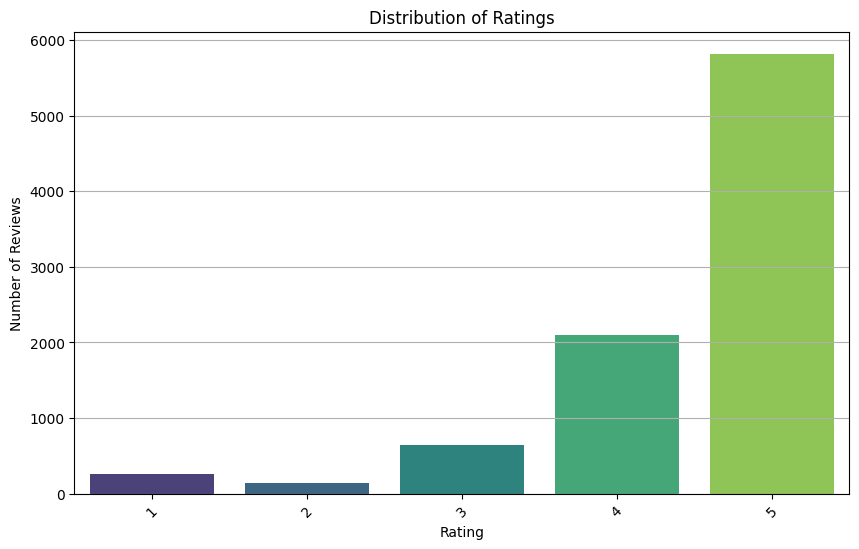

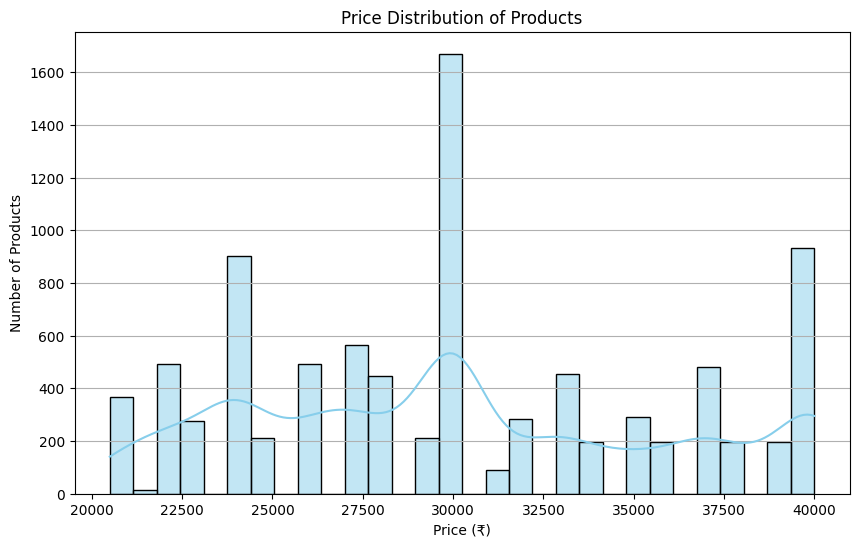

C:\Users\Vinitha Steffy R\AppData\Local\Temp\ipykernel_2664\2144601019.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='product_id', data=top_n, palette='coolwarm')


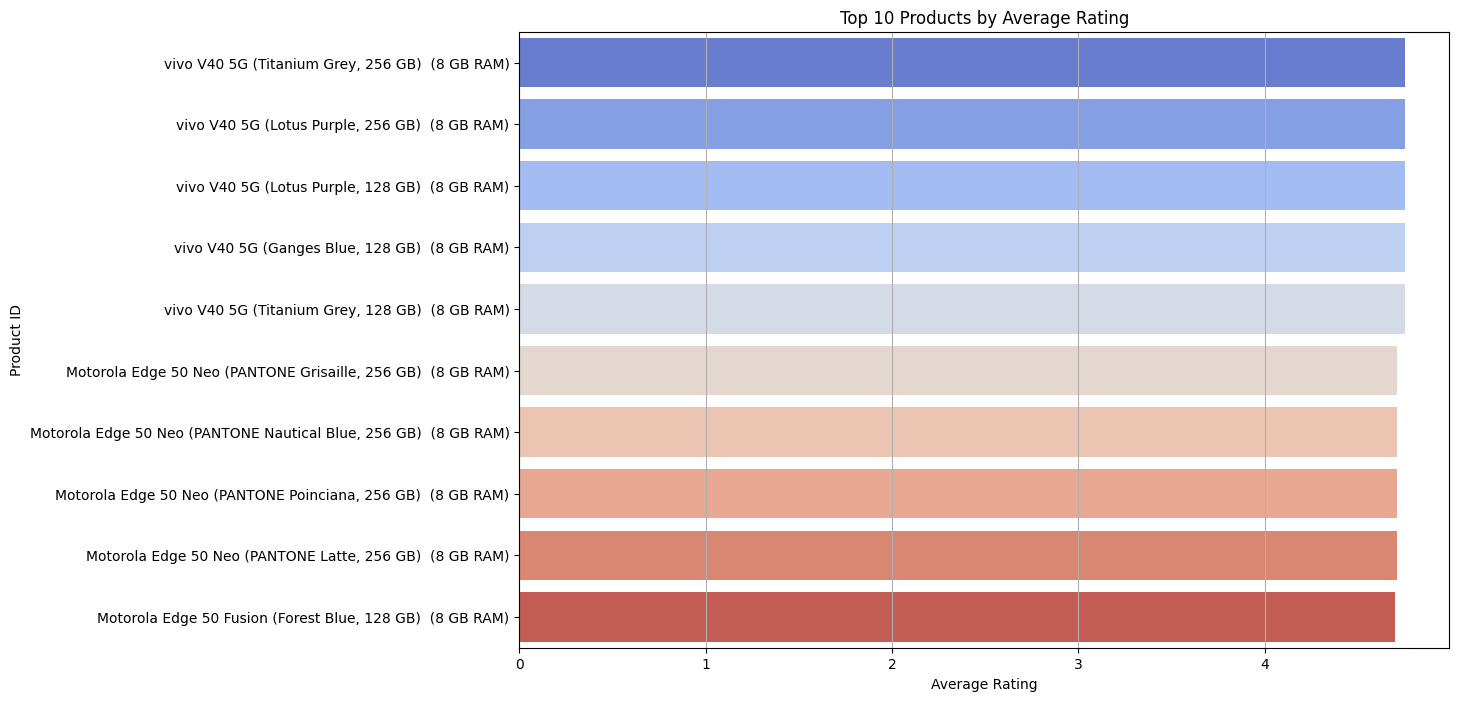

In [5]:
import pandas as pd
import re
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords  # Import stopwords here

# Download NLTK resources if necessary
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Load the spaCy English model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Load the dataset
file_path = r'D:\Guvi\projects\Flipkart\Mobile_Phone_Data.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Loaded dataset with {df.shape[0]} reviews.")
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()  # Exit if dataset fails to load

# Assign 'product_id' as Product Name
df['product_id'] = df['Product Name']

# Remove rows with missing values in 'Review', 'Rating', and 'Price'
df.dropna(subset=['Review', 'Rating', 'Price'], inplace=True)

# Cleaning the Review Text
def clean_review(text):
    """Remove HTML tags, special characters, emojis, and convert to lowercase."""
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis using regex
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Removes non-ASCII characters (including emojis)
    # Remove special characters, numbers (only keep alphabets)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function to reviews
df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))

def tokenize_and_normalize(text):
    """Tokenize, remove stopwords, and apply lemmatization."""
    doc = nlp(text)  # Tokenize and lemmatize using spaCy
    # Remove stopwords, punctuation, and retain only alphabetic tokens
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(words)

# Apply tokenization and normalization
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_and_normalize)

# Convert 'Rating' to numeric and filter out invalid entries
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'].notnull()]

# Convert 'Price' to numeric (remove currency symbols and commas)
df['Price'] = df['Price'].apply(lambda x: re.sub(r'[^\d]', '', str(x)))  # Remove non-numeric characters
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric

# Filter rows where the price is between ₹20,000 and ₹40,000
df = df[(df['Price'] >= 20000) & (df['Price'] <= 40000)]

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)

# Remove the 'Product Link' column
df.drop(columns=['Product Link'], inplace=True)

# Save the cleaned and processed data to a new CSV file
output_path = 'D:/Guvi/projects/Flipkart/FlipKart_Dataset.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}.")

# Display the first few rows of the cleaned data
print(df.head())

# Plot Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution of Products')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

# Calculate average rating for each product
avg_rating = df.groupby('product_id').agg(Avg_Rating=('Rating', 'mean')).reset_index()

# Get the top 10 products by average rating
top_n = avg_rating.sort_values(by='Avg_Rating', ascending=False).head(10)

# Horizontal Bar Plot for Top N Products
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Rating', y='product_id', data=top_n, palette='coolwarm')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.grid(axis='x')
plt.show()


Sentimental Analysis 

Sentiment analysis results with TextBlob saved to D:/Guvi/projects/Flipkart/FlipKart_Dataset_with_Sentiment_Analysis.csv.
                                       Product Name  \
0  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   
1  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   
2  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   
3  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   
4  SAMSUNG Galaxy S23 FE (Mint, 256 GB)  (8 GB RAM)   

                                      Cleaned_Review TextBlob_Sentiment  \
0  the camera is next level but im facing some ma...           Positive   
1                          camera quality is amazing  Strongly Positive   
2  nice product as a whole i dont play games so m...           Positive   
3  awesome photography like apple must buy dont g...           Positive   
4  camera and display is superb but bettary is a ...  Strongly Positive   

   TextBlob_Sentiment_Score  
0                  0.031250  
1                  0.600000  
2     

C:\Users\Vinitha Steffy R\AppData\Local\Temp\ipykernel_5052\725917990.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel',


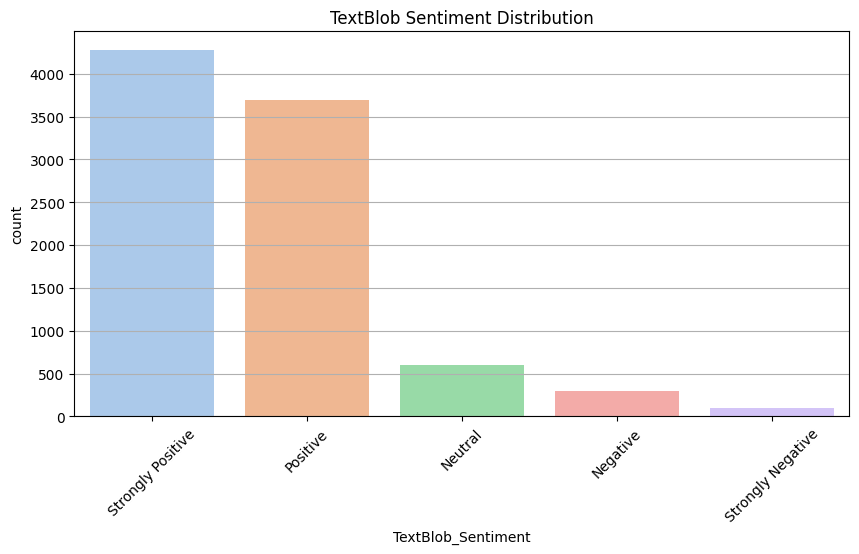

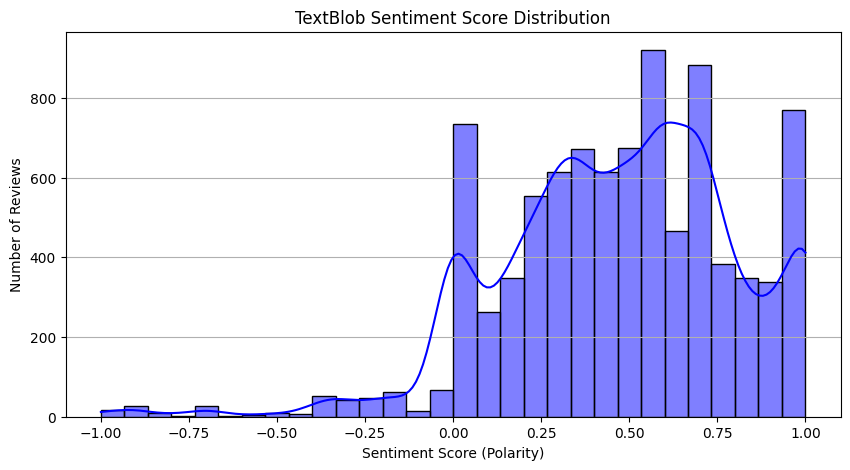

Top 5 Products Based on TextBlob Sentiment Analysis:
                                                 avg_textblob_sentiment_score  \
Product Name                                                                    
vivo V40 5G (Titanium Grey, 256 GB)  (8 GB RAM)                      0.592560   
vivo V40 5G (Lotus Purple, 256 GB)  (8 GB RAM)                       0.592560   
vivo V40 5G (Lotus Purple, 128 GB)  (8 GB RAM)                       0.592560   
vivo V40 5G (Ganges Blue, 128 GB)  (8 GB RAM)                        0.592560   
vivo V40e 5G (Royal Bronze, 256 GB)  (8 GB RAM)                      0.590545   

                                                 total_textblob_positive_reviews  \
Product Name                                                                       
vivo V40 5G (Titanium Grey, 256 GB)  (8 GB RAM)                               28   
vivo V40 5G (Lotus Purple, 256 GB)  (8 GB RAM)                                28   
vivo V40 5G (Lotus Purple, 128 GB)  (8 GB R

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = 'D:/Guvi/projects/Flipkart/FlipKart_Dataset.csv'
df = pd.read_csv(file_path)

# TextBlob Sentiment Analysis Function
def get_textblob_sentiment(text):
    """Determine sentiment polarity using TextBlob."""
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Polarity score (-1 to 1)
    
    # Categorize based on polarity thresholds
    if polarity > 0.5:
        sentiment = 'Strongly Positive'
    elif 0 < polarity <= 0.5:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    elif -0.5 <= polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Strongly Negative'
    
    return polarity, sentiment

# Apply TextBlob sentiment analysis
df['TextBlob_Sentiment_Score'], df['TextBlob_Sentiment'] = zip(*df['Cleaned_Review'].apply(get_textblob_sentiment))

# Save the updated DataFrame with TextBlob sentiment analysis
output_path = 'D:/Guvi/projects/Flipkart/FlipKart_Dataset_with_Sentiment_Analysis.csv'
df.to_csv(output_path, index=False)
print(f"Sentiment analysis results with TextBlob saved to {output_path}.")

# Display the first few rows with sentiment analysis
print(df[['Product Name', 'Cleaned_Review', 'TextBlob_Sentiment', 'TextBlob_Sentiment_Score']].head())

# Visualization: TextBlob Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel', 
              order=['Strongly Positive', 'Positive', 'Neutral', 'Negative', 'Strongly Negative'])
plt.title('TextBlob Sentiment Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Histogram of TextBlob Sentiment Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['TextBlob_Sentiment_Score'], bins=30, kde=True, color='blue')
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Polarity)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

# Aggregation: Average Sentiment Score by Product
product_sentiment_summary = df.groupby('Product Name').agg(
    avg_textblob_sentiment_score=('TextBlob_Sentiment_Score', 'mean'),
    total_textblob_positive_reviews=('TextBlob_Sentiment', lambda x: (x == 'Positive').sum()),
    total_reviews=('TextBlob_Sentiment', 'count')  # Using TextBlob_Sentiment for review count
).sort_values(by='avg_textblob_sentiment_score', ascending=False)

# Show the top 5 products based on TextBlob average sentiment score
print("Top 5 Products Based on TextBlob Sentiment Analysis:")
print(product_sentiment_summary.head())

# Save the product sentiment summary for future use in recommendation systems
summary_output_path = 'D:/Guvi/projects/Flipkart/Product_Sentiment_Summary_TextBlob.csv'
product_sentiment_summary.to_csv(summary_output_path)
print(f"Product sentiment summary saved to {summary_output_path}.")
